In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ESS_data.csv')

#### Cleaning for the whole project:

In [3]:
# Creating a few dataframes with the data separated by country:

spain = df.loc[df['cntry'] == 'ES']
serbia = df.loc[df['cntry'] == 'SE']
swiss = df.loc[df['cntry'] == 'CH']
norway = df.loc[df['cntry'] == 'NO']
czech = df.loc[df['cntry'] == 'CZ']
denmark = df.loc[df['cntry'] == 'DE']

##### Functions for later use:

In [4]:
# This helps rid a specific row of nulls:
#     (preserving as many rows in the whole df as possible)

def NA_Cleaner(df, col):

    beta = df.loc[df[col].isna()].index
    df.drop(index = beta, axis = 0, inplace = True)

In [5]:
# This takes care of rare instances where an id was only found in one of the years:

def double_id_issue(df):
    
    beta = df['idno'].value_counts()
    delta = beta.loc[beta == 1]
            
    ids = list()

    for x in delta.index:
        ids.append(x)

    for x in ids:
        gamma = df.loc[df['idno'] == x].index
        df.drop(index = gamma, axis = 0, inplace = True)

#### Question 1 - Did people become less trusting from 2012 to 2014?

In [6]:
# Looking at the averages for Spain:

spain.groupby('year').mean()

,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
year,,,,,,,,,,,
6,1467.60676,3.977741,5.114592,5.354253,4.748344,7.548680,5.228737,2.560266,1.515251,47.700340,1.372727
7,1467.60676,4.015677,4.895128,5.340284,4.326716,7.419967,5.260116,2.616878,1.493817,48.048223,1.398347


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


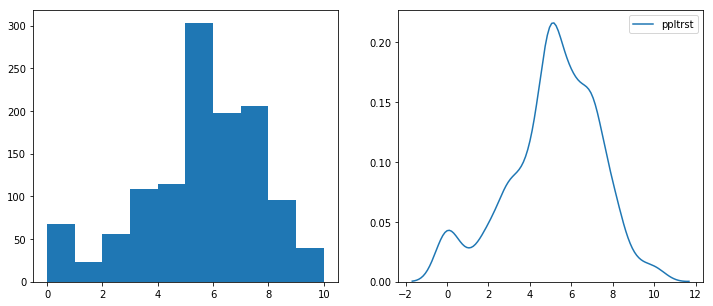

In [7]:
# Looking at the distribution visually:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.hist(spain.loc[spain['year'] == 6, 'ppltrst'])

ax2 = sns.kdeplot(spain.loc[spain['year'] == 6, 'ppltrst'])

plt.show()

In [8]:
from scipy.stats import ttest_rel

# Checking for nulls here and mitigating them:

spain.loc[spain['ppltrst'].isna()]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
4409,ES,814.0,7,7.0,NaN,5.0,5.0,8.0,7.0,1.0,2.0,80.0,2.0
4891,ES,1921.0,7,1.0,NaN,4.0,4.0,7.0,6.0,3.0,2.0,33.0,2.0


In [9]:
# Locating the nulls by 'idno' so we can take them out:

spain.loc[(spain['idno'] == 814)|(spain['idno'] == 1921)]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
3196,ES,814.0,6,7.0,6.0,7.0,4.0,8.0,7.0,3.0,2.0,51.0,1.0
3678,ES,1921.0,6,3.0,7.0,8.0,4.0,8.0,6.0,4.0,1.0,17.0,2.0
4409,ES,814.0,7,7.0,NaN,5.0,5.0,8.0,7.0,1.0,2.0,80.0,2.0
4891,ES,1921.0,7,1.0,NaN,4.0,4.0,7.0,6.0,3.0,2.0,33.0,2.0


In [10]:
# Dropping the nulls:

spain.drop(index = [3196, 3678, 4409, 4891], axis = 0, inplace = True)
spain.shape

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2422, 13)

In [11]:
ttest_rel(spain.loc[spain['year'] == 6, 'ppltrst'], 
          spain.loc[spain['year'] == 7, 'ppltrst'],
          axis = 0)

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)

This is a solid p-result here, so you can infer that the difference between these two groups is significant enough to allow acceptance of the other hypothesis (i.e. not the null hypothesis).

#### Question 2 - Did people become happier from 2012 to 2014?

In [12]:
# Taking care of the null values:

NA_Cleaner(swiss, 'happy')
NA_Cleaner(norway, 'happy')
NA_Cleaner(serbia, 'happy')
NA_Cleaner(czech, 'happy')

In [13]:
# Taking care of the double-ids:

double_id_issue(swiss)
double_id_issue(czech)
double_id_issue(serbia)
double_id_issue(norway)

# A list of our current data-frames for later use:

df_list = [swiss, serbia, czech, norway]

In [14]:
# Looking at the mean and descriptive statistics:

swiss_dscr6 = swiss.loc[swiss['year'] == 6, 'happy'].describe()
swiss_dscr7 = swiss.loc[swiss['year'] == 7, 'happy'].describe()

czech_dscr6 = czech.loc[czech['year'] == 6, 'happy'].describe()
czech_dscr7 = czech.loc[czech['year'] == 7, 'happy'].describe()

norway_dscr6 = norway.loc[norway['year'] == 6, 'happy'].describe()
norway_dscr7 = norway.loc[norway['year'] == 7, 'happy'].describe()

serbia_dscr6 = serbia.loc[serbia['year'] == 6, 'happy'].describe()
serbia_dscr7 = serbia.loc[serbia['year'] == 7, 'happy'].describe()

Here are the descriptive statistics for each country, divided up by the two years in question.  The results are also describing the results for the 'Happy' variable:

<table>
    <tr>
        <th> Switzerland 2012
        </th>
        <th> Switzerland 2014
        </th>
        <th> Czechoslovakia 2012
        </th>
        <th> Czechoslovakia 2014
        </th>
        <th> Norway 2012
        </th>
        <th> Norway 2014
        </th>
        <th> Serbia 2012
        </th>
        <th> Serbia 2014
        </th>
    </tr>
    <tr>
        <td>  {{swiss_dscr6}} 
        </td>
        <td>  {{swiss_dscr7}}
        </td>
        <td>  {{czech_dscr6}}
        </td>
        <td>  {{czech_dscr7}}
        </td>
        <td>  {{norway_dscr6}}
        </td>
        <td>  {{norway_dscr7}}
        </td>
        <td>  {{serbia_dscr6}}
        </td>
        <td>  {{serbia_dscr7}}
        </td>
    </tr>
    <tr>
        <td>  {{swiss.loc[swiss['year'] == 6, 'happy'].shape}}
        </td>
        <td>  {{swiss.loc[swiss['year'] == 7, 'happy'].shape}}
        </td>
        <td>  {{czech.loc[czech['year'] == 6, 'happy'].shape}}
        </td>
        <td>  {{czech.loc[czech['year'] == 7, 'happy'].shape}}
        </td>
        <td>  {{norway.loc[norway['year'] == 6, 'happy'].shape}}
        </td>
        <td>  {{norway.loc[norway['year'] == 7, 'happy'].shape}}
        </td>
        <td>  {{serbia.loc[serbia['year'] == 6, 'happy'].shape}}
        </td>
        <td>  {{serbia.loc[serbia['year'] == 7, 'happy'].shape}}
        </td>
    </tr>    
</table>

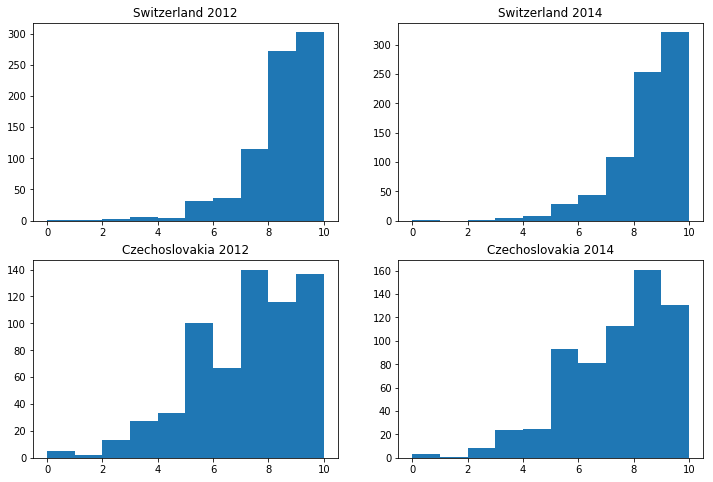

In [15]:
# Looking at the distributions visually:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8))

ax1.hist(swiss.loc[swiss['year'] == 6, 'happy'])
ax1.set_title('Switzerland 2012')
ax2.hist(swiss.loc[swiss['year'] == 7, 'happy'])
ax2.set_title('Switzerland 2014')

ax3.hist(czech.loc[czech['year'] == 6, 'happy'])
ax3.set_title('Czechoslovakia 2012')
ax4.hist(czech.loc[czech['year'] == 7, 'happy'])
ax4.set_title('Czechoslovakia 2014')

plt.show()

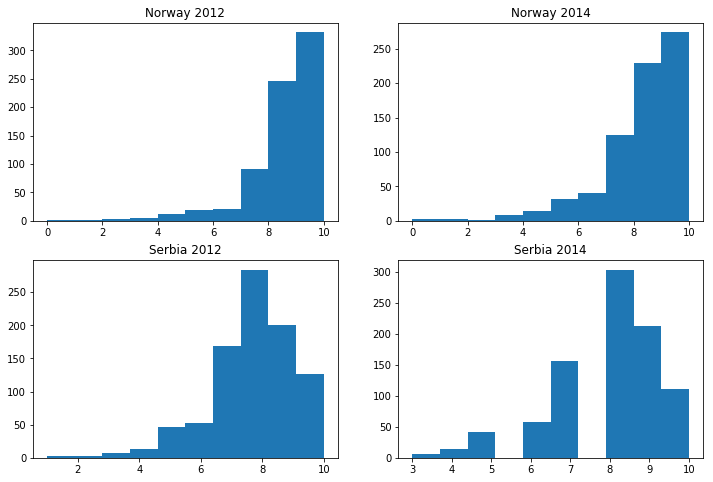

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8))

ax1.hist(norway.loc[norway['year'] == 6, 'happy'])
ax1.set_title('Norway 2012')
ax2.hist(norway.loc[norway['year'] == 7, 'happy'])
ax2.set_title('Norway 2014')

ax3.hist(serbia.loc[serbia['year'] == 6, 'happy'])
ax3.set_title('Serbia 2012')
ax4.hist(serbia.loc[serbia['year'] == 7, 'happy'])
ax4.set_title('Serbia 2014')

plt.show()

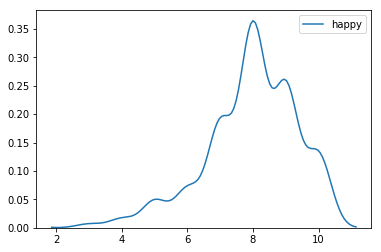

In [17]:
# Looking at Serbia's 2014 results in a different way to compare:

sns.kdeplot(data = serbia.loc[serbia['year'] == 7, 'happy'])
plt.show()

In [18]:
def ttests(df_list, col):
    
    for x in df_list:
        print(ttest_rel(x.loc[x['year'] == 6, col], 
                        x.loc[x['year'] == 7, col],
                        axis = 0))
    
    

In [19]:
ttests(df_list, 'happy')

Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355428359)
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591234161)
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)


#### Question 3 - Who reported watching more TV in 2012, men or women?

In [20]:
# Isolating the groups in question:

male = df.loc[(df['year'] == 6)&(df['gndr'] == 1)]
female = df.loc[(df['year'] == 6)&(df['gndr'] == 2)]

In [21]:
NA_Cleaner(male, 'tvtot')
NA_Cleaner(female, 'tvtot')

Here are the descriptive statistics for our two groups:

><table width='210'>
     <tr>
         <th style='textalign:center'> Male </th>
         <th style='textalign:center'> Female </th>
     </tr>
     <tr>
         <td style='textalign:right'> 
             {{male['tvtot'].describe()}} </td>
         <td style='textalign:right'> 
             {{female['tvtot'].describe()}} </td>
     </tr>
 </table>

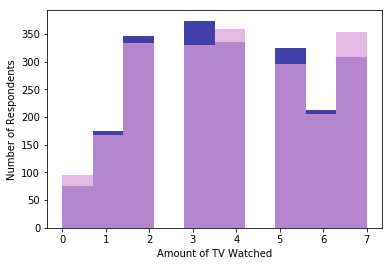

In [26]:
hist_kw = {'alpha':.75}
plt.hist(male['tvtot'], color = 'darkblue', **hist_kw)
plt.hist(female['tvtot'], color = 'plum', **hist_kw)
plt.xlabel('Amount of TV Watched')
plt.ylabel('Number of Respondents')
plt.show()

In [23]:
from scipy.stats import ttest_ind

results_3 = ttest_ind(male['tvtot'], 
                      female['tvtot'])

In [24]:
print("The T-Statistic is: {}.\nThe P-Value is: {}".format(results_3.statistic, 
                                                            results_3.pvalue))

The T-Statistic is: -0.6899928109209502.
The P-Value is: 0.4902360402696986


At first glance, it looks like women watched more tv since the descriptive statistics mention that the 75th percentile was at 6 for women and 5 for men.  It is difficult to reach a solid conclusion, however, since self-rating of this nature could vary differently for the groups. The P-value, however, is way off, so you cannot claim a significant difference between the two groups.

#### Question 4 - Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [28]:
# Isolating the groups in question:

couple = df.loc[(df['year'] == 6)&(df['partner'] == 1)]
alone = df.loc[(df['year'] == 6)&(df['partner'] == 2)]

In [38]:
NA_Cleaner(couple, 'pplfair')
NA_Cleaner(alone, 'pplfair')

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


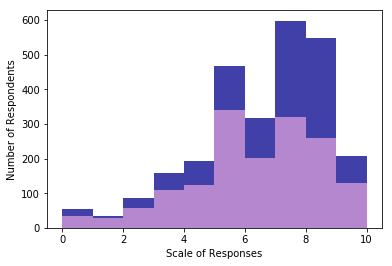

In [39]:
hist_kw = {'alpha':.75}
plt.hist(couple['pplfair'], color = 'darkblue', **hist_kw)
plt.hist(alone['pplfair'], color = 'plum', **hist_kw)
plt.xlabel('Scale of Responses')
plt.ylabel('Number of Respondents')
plt.show()

In [41]:
couple['pplfair'].describe()

count    2663.000000
mean        6.080736
std         2.116945
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64

In [42]:
alone['pplfair'].describe()

count    1608.000000
mean        5.856965
std         2.162229
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64

In [45]:
ttest_ind(alone['pplfair'],
          couple['pplfair'],
          axis = 0)


Ttest_indResult(statistic=-3.3201033970362084, pvalue=0.0009073952609883756)

This P-value is definitely what we're looking for.  The main thing here is that we are looking at an imbalanced population since there are more couple respondents than individual respondents.  And while the p-value allows us to keep our hypothesis in consideration, the imbalanced data-set will be weakening.  You will want to be sure to use some metrics to account for this with any models built or predictions used.

#### Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [60]:
from scipy.stats import f_oneway

In [47]:
NA_Cleaner(serbia, 'sclmeet')
NA_Cleaner(norway, 'sclmeet')
NA_Cleaner(spain, 'sclmeet')


In [71]:
NA_Cleaner(swiss, 'sclmeet')

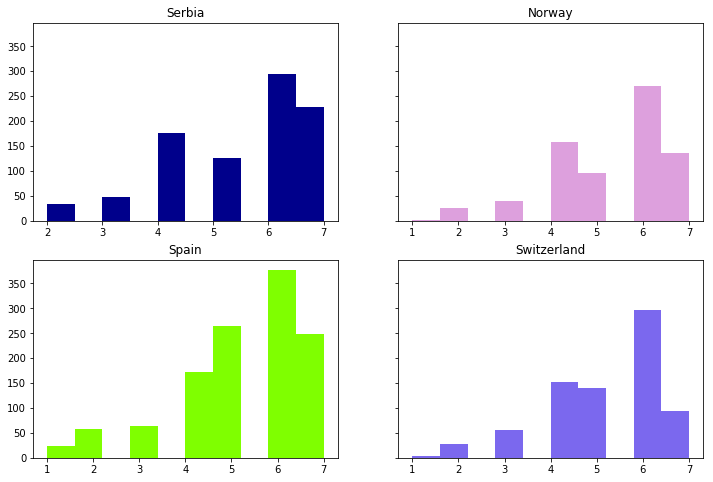

In [83]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8), sharey = True)

ax1.hist(serbia.loc[serbia['year'] == 7, 'sclmeet'], color = 'darkblue')
ax1.set_title('Serbia')

ax2.hist(norway.loc[norway['year'] == 7, 'sclmeet'], color = 'plum')
ax2.set_title('Norway')

ax3.hist(spain.loc[spain['year'] == 7, 'sclmeet'], color = 'chartreuse')
ax3.set_title('Spain')

ax4.hist(swiss.loc[swiss['year'] == 7, 'sclmeet'], color = 'mediumslateblue')
ax4.set_title('Switzerland')

plt.show()

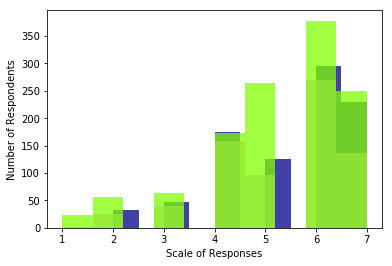

In [79]:
hist_kw = {'alpha':.75}
plt.hist(serbia.loc[serbia['year'] == 7, 'sclmeet'], color = 'darkblue', **hist_kw)
plt.hist(norway.loc[norway['year'] == 7, 'sclmeet'], color = 'plum', **hist_kw)
plt.hist(spain.loc[spain['year'] == 7, 'sclmeet'], color = 'chartreuse', **hist_kw)
plt.xlabel('Scale of Responses')
plt.ylabel('Number of Respondents')
plt.show()

In [84]:
print(serbia.loc[serbia['year'] == 7, 'sclmeet'].describe())
print(norway.loc[norway['year'] == 7, 'sclmeet'].describe())
print(spain.loc[spain['year'] == 7, 'sclmeet'].describe())
print(swiss.loc[swiss['year'] == 7, 'sclmeet'].describe())

count    904.000000
mean       5.425885
std        1.374919
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: sclmeet, dtype: float64
count    727.000000
mean       5.303989
std        1.349328
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64
count    1209.000000
mean        5.258065
std         1.468061
min         1.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: sclmeet, dtype: float64
count    769.000000
mean       5.162549
std        1.309362
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64


In [69]:
f_oneway(serbia.loc[serbia['year'] == 7, 'sclmeet'], 
         norway.loc[norway['year'] == 7, 'sclmeet'], 
         spain.loc[spain['year'] == 7, 'sclmeet'])

F_onewayResult(statistic=3.760009804148618, pvalue=0.023399625181072477)

Here, we are using ANOVA since we have more than two groups.  The P value is where we want it but we still have a little bit of class imbalance that you will want to keep an eye on with future models and predictions.  Since Serbia, Norway and Switzerland are somewhat closer to each other in population size, you can conclude somewhat more confidently that Serbians seem to be more socially active than the Norwegians and Swiss, but not markedly so. 

#### Question 6:  Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [136]:
swiss_14 = swiss.loc[(swiss['year'] == 7)]
norway_14 = norway.loc[norway['year'] == 7]
spain_14 = spain.loc[spain['year'] == 7]
serbia_14 = serbia.loc[serbia['year'] == 7]

In [142]:
NA_Cleaner(swiss_14, 'sclact')
NA_Cleaner(norway_14, 'sclact')
NA_Cleaner(spain_14, 'sclact')
NA_Cleaner(serbia_14, 'sclact')

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [145]:
NA_Cleaner(swiss_14, 'agea')
NA_Cleaner(norway_14, 'agea')
NA_Cleaner(spain_14, 'agea')
NA_Cleaner(serbia_14, 'agea')

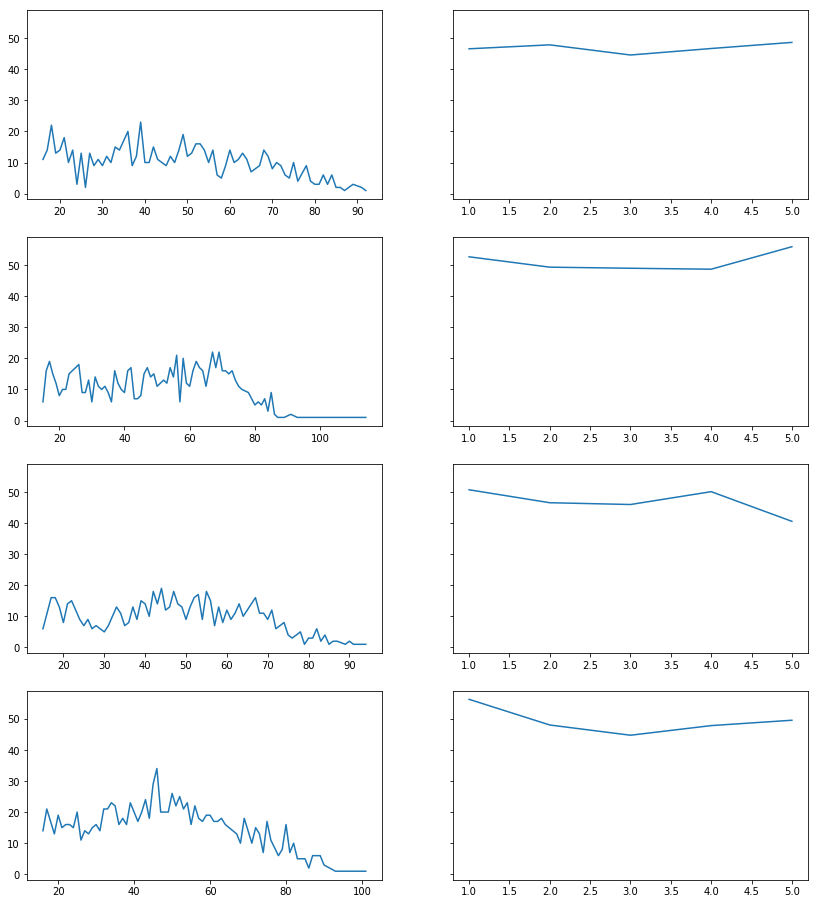

In [146]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(14, 16), sharey = True)

ax1.plot(swiss_14.groupby('agea')['sclact'].agg('count'))
ax2.plot(swiss_14.groupby('sclact').agg({'agea': 'mean'}))

ax3.plot(serbia_14.groupby('agea')['sclact'].agg('count'))
ax4.plot(serbia_14.groupby('sclact').agg({'agea': 'mean'}))

ax5.plot(norway_14.groupby('agea')['sclact'].agg('count'))
ax6.plot(norway_14.groupby('sclact').agg({'agea': 'mean'}))

ax7.plot(spain_14.groupby('agea')['sclact'].agg('count'))
ax8.plot(spain_14.groupby('sclact').agg({'agea': 'mean'}))

plt.show()

In [147]:
ch_dscr = swiss_14.groupby('agea')['sclact'].describe()
se_dscr = serbia_14.groupby('agea')['sclact'].describe()
sp_dscr = spain_14.groupby('agea')['sclact'].describe()
no_dscr = norway_14.groupby('agea')['sclact'].describe()

<table>
    <tr>
        <th> Switzerland </th>
        <th> Serbia </th>
        <th> Spain </th>
        <th> Norway </th>
    </tr>
        <td> {{ch_dscr}} </td>
        <td> {{se_dscr}} </td>
        <td> {{sp_dscr}} </td>
        <td> {{no_dscr}} </td>
    <tr>
    </tr>
    <tr>
    </tr>
    <tr>
    </tr>
    <tr>
    </tr>
<table>

In [148]:
f_oneway(swiss_14[['sclact', 'agea']],
         serbia_14[['sclact', 'agea']],
         spain_14[['sclact', 'agea']],
         norway_14[['sclact', 'agea']])

F_onewayResult(statistic=array([16.8047419 ,  4.64678427]), pvalue=array([7.76166288e-11, 3.02395224e-03]))